### Pymaceuticals Analysis
* **Observed trend 1:** Of the four treatments of interest (Capomulin, Infubinol, Ketapril, and Placebo), Capomulin is the only treatment under which the tumor volume decreases over 45 days.
* **Observed trend 2:** Over 45 days of treatment, Capomulin has the least increase in the number of metastatic (cancer spreading) sites.
* **Observed trend 3:** Capomulin has the highest survival rate over 45 days of treatment.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib as mpl

### Read data

In [2]:
clinical = pd.read_csv('raw_data/clinicaltrial_data.csv')
mouse = pd.read_csv('raw_data/mouse_drug_data.csv')

In [3]:
clinical.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
mouse.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


Note that Mouse ID g989 corresponds to 2 drugs, such that both the clinical table and the mouse table have 249 unique mouse ID's. However, the [README](../README.md) description says there are 250 mice in the study, which suggests that some of the g989 entries should have been written under a different mouse ID. The test results of g989 is messed up because there is no definitive evidence which drug g989 results should be related to. Therefore, g989 entries were removed from the dataset to avoid ambiguity.

In [5]:
clinical = clinical.drop(clinical.loc[clinical['Mouse ID']=='g989'].index)
mouse = mouse.drop(mouse.loc[mouse['Mouse ID']=='g989'].index)
data = pd.merge(clinical, mouse, on='Mouse ID', how='inner')
data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


### Tumor Response to Treatment

In [6]:
grouper = data.groupby(['Drug', 'Timepoint'])
tumor = pd.DataFrame()
tumor['Tumor Volume (mm3)'] = grouper['Tumor Volume (mm3)'].mean()
tumor['Standard Error'] = grouper['Tumor Volume (mm3)'].sem()
tumor.head()

Tumor Volume (mm3)  Standard Error
Drug      Timepoint                                    
Capomulin 0                   45.000000        0.000000
          5                   44.266086        0.448593
          10                  43.084291        0.702684
          15                  42.064317        0.838617
          20                  40.716325        0.909731

In [7]:
tumor_mean = tumor['Tumor Volume (mm3)'].unstack(level=0)
tumor_se = tumor['Standard Error'].unstack(level=0)
tumor_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.168130,43.944859,47.470830,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,48.938560,42.531957,49.335368,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,50.891769,41.495061,51.448025,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.127384,40.238325,53.970080,53.170334


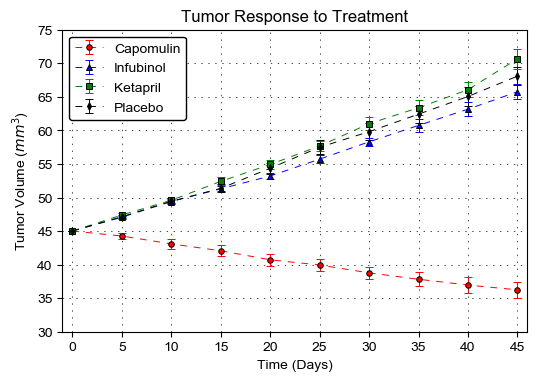

In [8]:
mpl.rcParams['figure.dpi']= 100
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Arial']
drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
markers = ['o', '^', 's', 'd']
colors = ['r', 'b', 'g', 'k']
x = tumor_mean.index
for i in range(len(drugs)):
    drug = drugs[i]
    plt.errorbar(x, tumor_mean[drug], yerr=tumor_se[drug], linestyle='--', linewidth=0.7, dashes=(7, 7), 
                 color=colors[i], capsize=3, marker=markers[i], markersize=4, markerfacecolor=colors[i], 
                 markeredgecolor='k', markeredgewidth=0.7, capthick=0.7)

plt.xticks(range(0,46,5))    
plt.xlim((-1, 46))
plt.ylim((30, 75))
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume ($mm^3$)')
plt.title('Tumor Response to Treatment')
plt.legend(loc='best', framealpha=1, edgecolor='k')
plt.grid(linestyle='--', dashes=(2, 8), linewidth=0.5, color='k')

### Metastatic Response to Treatment

In [9]:
grouper = data.groupby(['Drug', 'Timepoint'])
metastatic = pd.DataFrame()
metastatic['Metastatic Sites'] = grouper['Metastatic Sites'].mean()
metastatic['Standard Error'] = grouper['Metastatic Sites'].sem()
metastatic.head()

Metastatic Sites  Standard Error
Drug      Timepoint                                  
Capomulin 0                  0.000000        0.000000
          5                  0.160000        0.074833
          10                 0.320000        0.125433
          15                 0.375000        0.132048
          20                 0.652174        0.161621

In [10]:
metastatic_mean = metastatic['Metastatic Sites'].unstack(level=0)
metastatic_se = metastatic['Standard Error'].unstack(level=0)
metastatic_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.347826,0.120000,0.260870,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.619048,0.250000,0.523810,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.800000,0.333333,0.809524,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.947368,1.294118


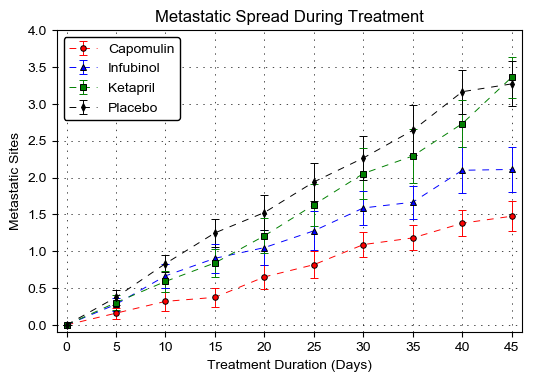

In [11]:
drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
markers = ['o', '^', 's', 'd']
colors = ['r', 'b', 'g', 'k']
x = metastatic_mean.index
for i in range(len(drugs)):
    drug = drugs[i]
    plt.errorbar(x, metastatic_mean[drug], yerr=metastatic_se[drug], linestyle='--', linewidth=0.7, 
                 dashes=(7, 7), color=colors[i], capsize=3, marker=markers[i], markersize=4, 
                 markerfacecolor=colors[i], markeredgecolor='k', markeredgewidth=0.7, capthick=0.7)

plt.xticks(range(0,46,5))    
plt.xlim((-1, 46))
plt.ylim((-0.1, 4))
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Metastatic Sites')
plt.title('Metastatic Spread During Treatment')
plt.legend(loc='best', framealpha=1, edgecolor='k')
plt.grid(linestyle='--', dashes=(2, 8), linewidth=0.5, color='k')

### Survival Rates

In [12]:
grouper = data.groupby(['Drug', 'Timepoint'])
survival = pd.DataFrame()
survival['Mouse Count'] = grouper['Mouse ID'].count()
survival.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [13]:
survival_count = survival['Mouse Count'].unstack(level=0)
survival_count.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,24,25,24,25
5,25,21,25,23,23,24,23,25,23,24
10,25,20,21,22,21,24,21,24,21,22
15,24,19,21,19,21,20,15,24,21,21
20,23,18,20,19,20,19,15,23,19,17


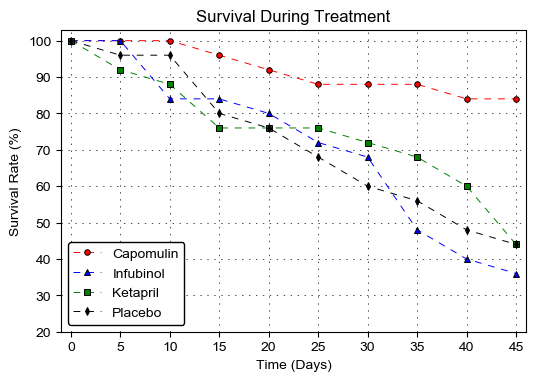

In [14]:
drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
markers = ['o', '^', 's', 'd']
colors = ['r', 'b', 'g', 'k']
x = survival_count.index
for i in range(len(drugs)):
    drug = drugs[i]
    survival_rate = survival_count[drug] / survival_count.loc[0, drug] * 100
    plt.errorbar(x, survival_rate, linestyle='--', linewidth=0.7, 
                 dashes=(7, 7), color=colors[i], marker=markers[i], markersize=4, 
                 markerfacecolor=colors[i], markeredgecolor='k', markeredgewidth=0.7)

plt.xticks(range(0,46,5))    
plt.xlim((-1, 46))
plt.ylim((20, 103))
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')
plt.title('Survival During Treatment')
plt.legend(loc='best', framealpha=1, edgecolor='k')
plt.grid(linestyle='--', dashes=(2, 8), linewidth=0.5, color='k')

### Summary Bar Graph
* Calculate the total % tumor volume change for each drug across the full 45 days

In [15]:
grouper = data.groupby(['Drug', 'Timepoint'])
tumor_change = pd.DataFrame()
tumor_change['Tumor Volume'] = grouper['Tumor Volume (mm3)'].mean()
tumor_change = tumor_change.unstack(level=-1)
tumor_change.columns = tumor_change.columns.droplevel(level=0) # flatten multiindex column
tumor_change['% Tumor Volume Change'] = (tumor_change[45] - tumor_change[0]) / tumor_change[0] * 100
tumor_change = tumor_change[['% Tumor Volume Change']]
tumor_change.head()

Timepoint,% Tumor Volume Change
Drug,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347


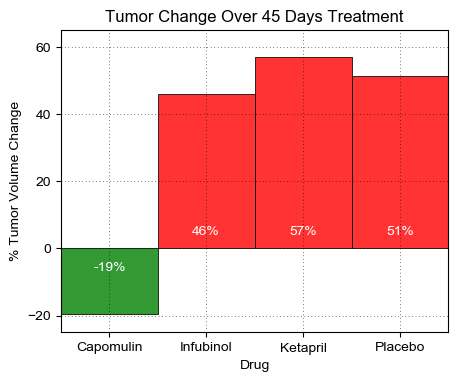

In [16]:
drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
colors = ['r' if (tumor_change.loc[drug]>0).values[0] else 'g' for drug in drugs]
ax = tumor_change.loc[drugs].plot(kind='bar', color=[tuple(colors)], rot=0, legend=False, alpha=0.8,
                            edgecolor = 'k', linewidth=0.7, width=1, figsize=(5,4))

plt.xlim((-0.5, 3.5))
plt.ylim((-25, 65))
plt.yticks(range(-20,70,20))
plt.ylabel('% Tumor Volume Change')
plt.title('Tumor Change Over 45 Days Treatment')
plt.grid(linestyle='--', dashes=(1, 4), linewidth=0.5, color='k')

# Add text labels
posx = range(len(drugs))
posy = [3 if (tumor_change.loc[drug]>0).values[0] else -4 for drug in drugs]
va = ['bottom' if (tumor_change.loc[drug]>0).values[0] else 'top' for drug in drugs]
labels = tumor_change.loc[drugs].values
for i in range(len(drugs)):
    ax.text(posx[i], posy[i], '%1.0d%%' % int(labels[i]), ha='center', va=va[i], color='w')
